In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
x = np.genfromtxt('preprocessed_x_bathroom.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y_bathroom.csv', delimiter=',', dtype= None)

In [3]:
hgb=HistGradientBoostingClassifier(max_iter=100)

In [4]:
feature_names=[]
for names in y:
  if names not in feature_names:
    feature_names.append(names)
#feature_names

Histogram-based Gradient Boost
                   precision    recall  f1-score   support

       b'driving'       0.73      0.45      0.56       130
        b'eating'       0.53      0.27      0.36       153
         b'lying'       0.69      0.45      0.54       183
       b'sitting'       0.66      0.79      0.72       642
b'using_computer'       0.82      0.89      0.85       828
       b'walking'       0.80      0.67      0.73        96

         accuracy                           0.74      2032
        macro avg       0.71      0.59      0.63      2032
     weighted avg       0.73      0.74      0.72      2032



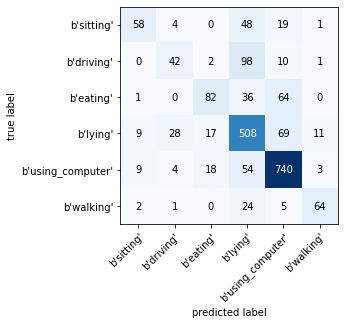

In [5]:

fin_pred = cross_val_predict(hgb, x, y, cv=5)

print("Histogram-based Gradient Boost")
print(classification_report(y, fin_pred))

cm = confusion_matrix(y_target=y, 
            y_predicted=fin_pred, 
            binary=False)
fig,ax=plot_confusion_matrix(conf_mat=cm
            ,show_absolute=True
            ,show_normed=False
            ,colorbar=False
            ,class_names=feature_names
            #,cmap='PuBu'
            ,fontcolor_threshold=0.6
            )
plt.show()